# Time Series data generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

We will generate our data based on the equation of a wave: 
y(x,t) = a * sin (ω*x + φ) 

a = amplitude of the wave (min max values)

ω = angular frequency (how many cycles occur in a second)

x = number of points

φ = phase of the signal (where do we start)

In [2]:
# We define the 3 types of time series functions we are going to generate and the corresponding functions to generate anomalies

# the number of samples in a time series will be of 1024 values for computational reasons 
sample=1024

# noise parameters for each type of time series 
noise = 0.04*np.random.rand(sample)
noiseupd = 0.02*np.random.rand(sample)
noisedec = 0.005*np.random.rand(sample)

def timeseries(amplitude,frequency,phase,x):
    y = np.zeros(len(x))
    number = random.uniform(0,1)
    if number<0.65:
        for i in range(len(amplitude)):
            y += np.sin(frequency[i]*x+phase[i])*amplitude[i]
    else:
        for i in range(len(amplitude)):
            y += (np.sin(frequency[i]*x+phase[i])*amplitude[i])+noise
    return y

def timeseriesPeak(timeseries,x):
    start = np.random.randint(len(x))
    end = start+100
    
    peak = np.sin(0.001*x)*300
    peak += np.random.rand(1024)
    
    peak[x<start]=0
    peak[x>end]=0
    
    return timeseries+peak, peak

def timeseriesDec(amplitude,frequency,phase,x,slope):

    y = np.zeros(len(x))
    number = random.uniform(0,1)
    if number<0.65 :
        for i in range(len(amplitude)):
              y += (np.sin(frequency[i]*x-phase[i])*amplitude[i]-slope[i]*x)
    else:
         for i in range(len(amplitude)):
              y += (np.sin(frequency[i]*x-phase[i])*amplitude[i]-slope[i]*x)+noisedec
        
    return y

def timeseriesPeakDec(timeseriesDec,x):
    start = np.random.randint(len(x))
    end = start+80
    
    peakDec = abs(np.sin(0.01*x))*30 #+500*x
    peakDec += np.random.rand(1024)
    
    peakDec[x<start]=0
    peakDec[x>end]=0
    
    return timeseriesDec+peakDec, peakDec

def updwntimeseries(amplitude,frequency,phase,x):
    y = np.zeros(len(x))
    number = random.uniform(0,1)
    if number<0.65:
        for i in range(len(amplitude)):
            y += np.sin(frequency[i]*x+phase[i])*amplitude[i]
    else:
        for i in range(len(amplitude)):
            y += (np.sin(frequency[i]*x+phase[i])*amplitude[i])+noiseupd
    return y

def updwntimeseriesPeak(timeseriesPeakDec,x):
    start = np.random.randint(len(x))
    end = start+80
    
    peak = np.sin(0.001*x)*60
    
    peak[x<start]=0
    peak[x>end]=0
    
    return timeseriesPeakDec+peak, peak

## Regular time series data generation

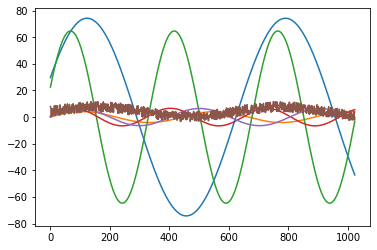

In [3]:
# vectors for w phase and amplitude regular shape
# these arrrays contain 200 random values between (0,1) and we multiply the w by 0.02 to
# ensure cycles in the time series 
p1 = np.random.rand(200)
a1 = np.random.rand(200)
w1 = np.ones(200)*0.02

x = np.arange(start=0, stop=(1024))
peak=np.zeros(1000)

# We will create 1000 time series, we will multiply the w phase and amplitude
# to obtain different results
yValues = []
peak = np.zeros(1024)
for i in range(0,1000):
    rand_w = np.random.uniform(0.3,1)
    rand = np.random.uniform(0,1)
    y=timeseries(a1*rand,w1*rand_w,p1*rand,x)
    yValues.append((y,peak))
    if i <= 5:
        plt.plot(x,y)


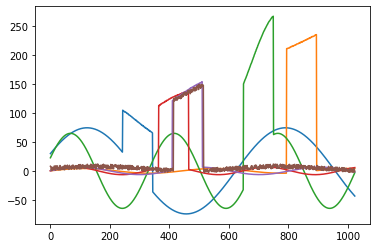

In [4]:
# We will create 200 time series with spikes
ySpikes = []
for i in range(0,len(yValues)):
    y, peak = timeseriesPeak(yValues[i][0],x)
    ySpikes.append((y,peak))
    if i <= 5:
        plt.plot(x,y)
      

## Decreasing time series data generation

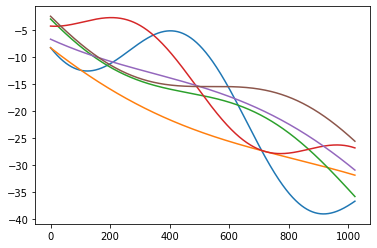

In [5]:
p2 = np.ones(200)
a2 = np.ones(200)
w2 = np.ones(200)

b = np.ones(200)

x = np.arange(start=0, stop=(1024))
yValuesDec = []
for i in range(0,1000):
    rand_w = np.random.uniform(0.002,0.01)
    rand_s = np.random.uniform(0.0002,0.0001)
    rand = np.random.uniform(0,3)
    rand_a = np.random.uniform(0.02,0.05)
    y = timeseriesDec(rand_a*a2,w2*rand_w,p2*rand,x,b*rand_s)
    yValuesDec.append(y)
    if i <= 5:
        plt.plot(x,y)



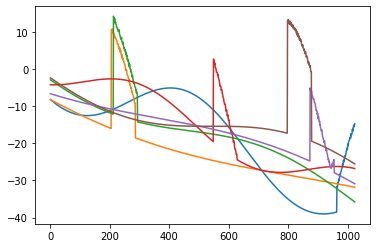

In [6]:
# We will create 200 time series with spikes
ySpikesDec = []
for i in range(0,len(yValuesDec)):
    y, peakDec = timeseriesPeakDec(yValuesDec[i],x)
    ySpikesDec.append((y,peakDec))
    if i <= 5:
        plt.plot(x,y)

## Irregular time series data generation

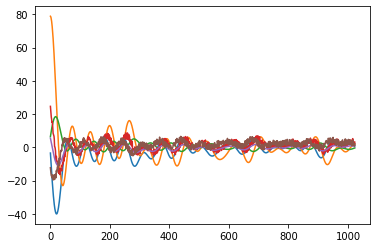

In [7]:
w3 = np.random.rand(200)*0.1#+0.1
p3 = np.random.rand(200)
a3 = np.random.rand(200)*0.1#+0.1

x = np.arange(start=0, stop=1024)

yValuesupdwn = []
for i in range(0,1000):
  randa = np.random.uniform(1,10)
  randp = np.random.uniform(1,20)
  y = updwntimeseries(a3*randa,w3,p3+randp,x)
  yValuesupdwn.append(y)
  if i <= 5:
      plt.plot(x,y)


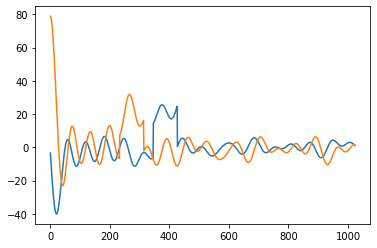

In [8]:
ySpikesupdwn = []
for i in range(0,len(yValuesupdwn)):
    y, peakupdwn = updwntimeseriesPeak(yValuesupdwn[i],x)
    ySpikesupdwn.append((y,peakupdwn))
    if i <= 1:
        plt.plot(x,y)

# Dataframe creation and preprocessing

In [9]:
data = yValues + ySpikes + ySpikesDec + ySpikesupdwn

In [10]:
def timeseries2Df(data):
    values = []
    peaks = []
    for i in range(len(data)):
        peak = [1 if x > 0 else 0 for x in data[i][1]]
        values.append(data[i][0])
        peaks.append(peak)
    d = { 'value': values , 'anomaly':peaks}
    return pd.DataFrame(data=d)

In [11]:
df = timeseries2Df(data)
df

,value,anomaly
0,"[29.713868591793712, 30.353991461755133, 30.99...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0.09136104721455664, 0.1495431684365007, 0.20...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[22.54458029102524, 23.634389395181746, 24.716...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0.2342740591178127, 0.36199740924902996, 0.48...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0.22481910066838137, 0.3254612977226207, 0.42...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
3995,"[18.682447718427124, 14.57868786680582, 10.431...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3996,"[12.762121406586376, 14.553204983578722, 16.27...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3997,"[3.2001730935446964, 4.330579566091666, 5.4395...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3998,"[-48.62238072874424, -47.67252987976832, -46.5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Scaling values

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

def scaleDf(df):
  test = df['value']
  test = [item for sublist in test for item in sublist] 
  test = scaler.fit_transform(np.array(test).reshape(-1, 1))
  scaled = []
  test= [item for sublist in test for item in sublist]
  for i in range(0,len(test),1024):
    scaled.append(test[i:i+1024])
  df['value']=scaled
  return df


In [13]:
df=scaleDf(df)
df

,value,anomaly
0,"[0.2867743957961991, 0.2882322976293325, 0.289...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0.2193081169334357, 0.21944062871385397, 0.21...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0.27044609533009945, 0.2729281730143587, 0.27...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0.2196336062290219, 0.21992450054795393, 0.22...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0.21961207223624885, 0.21984128829844762, 0.2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
3995,"[0.2616499556800127, 0.25230350159881654, 0.24...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3996,"[0.24816620906227244, 0.2522454634565884, 0.25...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3997,"[0.22638854319829485, 0.2289630827841269, 0.23...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3998,"[0.10836089606904564, 0.11052421401769004, 0.1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Histogram of values

(array([1.652260e+05, 1.198782e+06, 2.184596e+06, 4.278210e+05,
        6.183000e+04, 1.559000e+04, 1.696700e+04, 1.695600e+04,
        6.861000e+03, 1.371000e+03]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

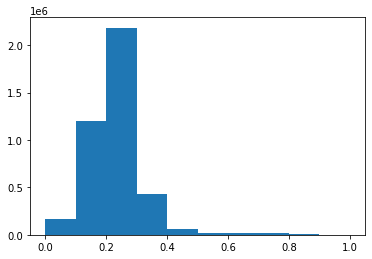

In [14]:
test = df['value']
test = [item for sublist in test for item in sublist]
plt.hist(test)

In [15]:
anomal = [item for sublist in df['anomaly'] for item in sublist]
np.unique(anomal)

array([0, 1])

# Read data frame and data frame partition

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['value'], df['anomaly'], test_size=0.3)

In [17]:
X_train = np.array([np.array(val) for val in X_train])
y_train  = np.array([np.array(val) for val in y_train])
X_test = np.array([np.array(val) for val in X_test])
y_test  = np.array([np.array(val) for val in y_test])

# Model training 

## Simple CNN


In [18]:
from keras.layers import Input, Dense, LSTM, MaxPooling1D, Conv1D, MaxPooling1D
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

input_layer = Input(shape=(1024, 1))
conv1 = Conv1D(filters=32,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(input_layer)
lstm1 = LSTM(32, return_sequences=True)(conv1)
output_layer = Dense(1, activation='sigmoid')(lstm1)
model = Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 1024, 32)          288       
                                                                 
 lstm (LSTM)                 (None, 1024, 32)          8320      
                                                                 
 dense (Dense)               (None, 1024, 1)           33        
                                                                 
Total params: 8,641
Trainable params: 8,641
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow import keras
from tensorflow.keras import layers

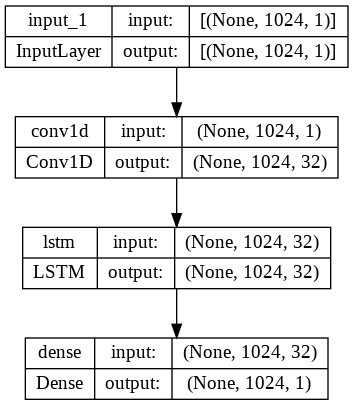

In [20]:
keras.utils.plot_model(model, to_file = "Model.png", show_shapes=True)

In [21]:
early_stopping = EarlyStopping(monitor='loss', patience=2)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

historytrain = model.fit(X_train, y_train, epochs=200, batch_size=32 , validation_split = 0.1, callbacks=[early_stopping])

Epoch 1/200
79/79 [==============================] - 41s 474ms/step - loss: 0.3092 - accuracy: 0.9376 - val_loss: 0.2341 - val_accuracy: 0.9371
Epoch 2/200
79/79 [==============================] - 36s 453ms/step - loss: 0.2098 - accuracy: 0.9379 - val_loss: 0.1921 - val_accuracy: 0.9454
Epoch 3/200
79/79 [==============================] - 36s 457ms/step - loss: 0.1796 - accuracy: 0.9506 - val_loss: 0.1759 - val_accuracy: 0.9523
Epoch 4/200
79/79 [==============================] - 36s 457ms/step - loss: 0.1658 - accuracy: 0.9534 - val_loss: 0.1626 - val_accuracy: 0.9545
Epoch 5/200
79/79 [==============================] - 36s 462ms/step - loss: 0.1334 - accuracy: 0.9622 - val_loss: 0.1235 - val_accuracy: 0.9671
Epoch 6/200
79/79 [==============================] - 37s 464ms/step - loss: 0.1338 - accuracy: 0.9616 - val_loss: 0.1886 - val_accuracy: 0.9484
Epoch 7/200
79/79 [==============================] - 37s 463ms/step - loss: 0.1760 - accuracy: 0.9495 - val_loss: 0.1608 - val_accuracy:

In [33]:
save_model = model.save("my_h5_model.h5")

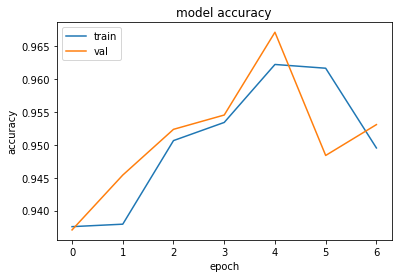

In [31]:
plt.plot(historytrain.history['accuracy'])
plt.plot(historytrain.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

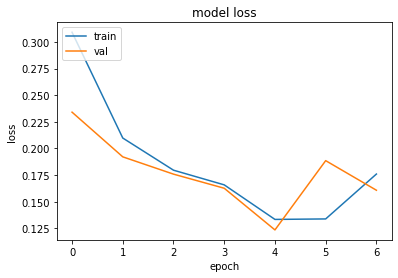

In [32]:
plt.plot(historytrain.history['loss'])
plt.plot(historytrain.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
from sklearn.metrics import confusion_matrix


##Deeper CNN


In [34]:
input_layer = Input(shape=(1024, 1))
conv1 = Conv1D(filters=32,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2,strides=1, padding='same')(conv1)
conv2 = Conv1D(filters=64,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(pool1)
pool2 = MaxPooling1D(pool_size=2,strides=1, padding='same')(conv2)
conv3 = Conv1D(filters=64,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(pool2)
pool3 = MaxPooling1D(pool_size=2,strides=1, padding='same')(conv3)
conv4 = Conv1D(filters=128,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(pool3)
pool4= MaxPooling1D(pool_size=2,strides=1, padding='same')(conv4)
conv5 = Conv1D(filters=128,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(pool4)
pool5 = MaxPooling1D(pool_size=2,strides=1, padding='same')(conv5)
conv6 = Conv1D(filters=32,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(pool5)
pool6 = MaxPooling1D(pool_size=2,strides=1, padding='same')(conv6)
lstm = LSTM(32, return_sequences=True)(pool6)
conv2 = Conv1D(filters=32,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(lstm)
output_layer = Dense(1, activation='sigmoid')(lstm)
model2 = Model(inputs=input_layer, outputs=output_layer)

model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1024, 1)]         0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1024, 32)          288       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1024, 32)         0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 1024, 64)          16448     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1024, 64)         0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 1024, 64)          3283

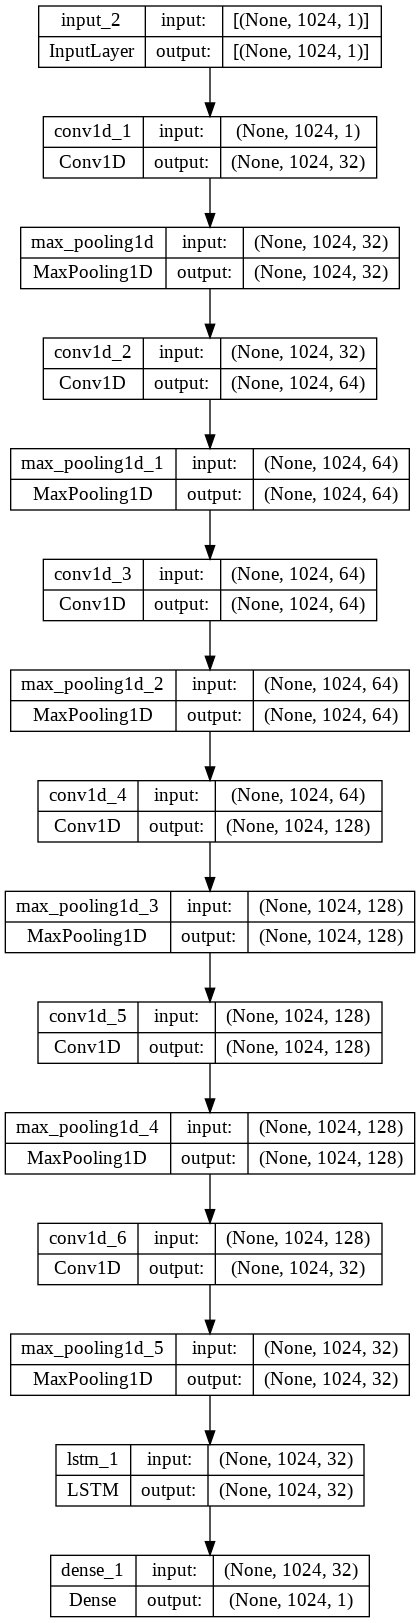

In [35]:
keras.utils.plot_model(model2, to_file = "Model2.png", show_shapes=True)

In [37]:
early_stopping = EarlyStopping(monitor='loss', patience=2)

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

historytrain = model2.fit(X_train, y_train, epochs=200, batch_size=32 , validation_split = 0.1, callbacks=[early_stopping])

Epoch 1/200
79/79 [==============================] - 180s 2s/step - loss: 0.0143 - accuracy: 0.9971 - val_loss: 0.0139 - val_accuracy: 0.9975
Epoch 2/200
79/79 [==============================] - 164s 2s/step - loss: 0.0130 - accuracy: 0.9973 - val_loss: 0.0116 - val_accuracy: 0.9977
Epoch 3/200
79/79 [==============================] - 163s 2s/step - loss: 0.0154 - accuracy: 0.9967 - val_loss: 0.0179 - val_accuracy: 0.9962
Epoch 4/200
79/79 [==============================] - 163s 2s/step - loss: 0.0128 - accuracy: 0.9973 - val_loss: 0.0118 - val_accuracy: 0.9975
Epoch 5/200
79/79 [==============================] - 164s 2s/step - loss: 0.0109 - accuracy: 0.9977 - val_loss: 0.0104 - val_accuracy: 0.9978
Epoch 6/200
79/79 [==============================] - 164s 2s/step - loss: 0.0100 - accuracy: 0.9979 - val_loss: 0.0103 - val_accuracy: 0.9980
Epoch 7/200
79/79 [==============================] - 163s 2s/step - loss: 0.0107 - accuracy: 0.9977 - val_loss: 0.0109 - val_accuracy: 0.9978
Epoch 

In [38]:
save_model2 = model2.save("my_h5_model2.h5")

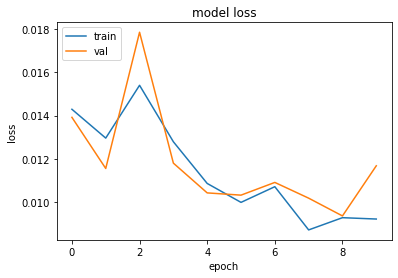

In [39]:
plt.plot(historytrain.history['loss'])
plt.plot(historytrain.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##Unet


In [40]:
from keras.layers import Input, Dense, Conv1DTranspose, MaxPooling1D, Conv1D, Dropout, concatenate
from keras.models import Model

def build_model(input_layer, start_neurons):
    conv1 = Conv1D(start_neurons * 1, 8, activation="relu", padding="same")(input_layer)
    conv1 = Conv1D(start_neurons * 1, 8, activation="relu", padding="same")(conv1)
    pool1 = MaxPooling1D(2)(conv1)
    pool1 = Dropout(0.25)(pool1)

    conv2 = Conv1D(start_neurons * 2, 8, activation="relu", padding="same")(pool1)
    conv2 = Conv1D(start_neurons * 2, 8, activation="relu", padding="same")(conv2)
    pool2 = MaxPooling1D(2)(conv2)
    pool2 = Dropout(0.5)(pool2)

    conv3 = Conv1D(start_neurons * 4, 8, activation="relu", padding="same")(pool2)
    conv3 = Conv1D(start_neurons * 4, 8, activation="relu", padding="same")(conv3)
    pool3 = MaxPooling1D(2)(conv3)
    pool3 = Dropout(0.5)(pool3)

    conv4 = Conv1D(start_neurons * 8, 8, activation="relu", padding="same")(pool3)
    conv4 = Conv1D(start_neurons * 8, 8, activation="relu", padding="same")(conv4)
    pool4 = MaxPooling1D(2)(conv4)
    pool4 = Dropout(0.5)(pool4)

    # Middle
    convm = Conv1D(start_neurons * 16, 8, activation="relu", padding="same")(pool4)
    convm = Conv1D(start_neurons * 16, 8, activation="relu", padding="same")(convm)
    
    deconv4 = Conv1DTranspose(start_neurons * 8, 8, strides=2, padding="same")(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(0.5)(uconv4)
    uconv4 = Conv1D(start_neurons * 8,8, activation="relu", padding="same")(uconv4)
    uconv4 = Conv1D(start_neurons * 8, 8, activation="relu", padding="same")(uconv4)

    deconv3 = Conv1DTranspose(start_neurons * 4, 8, strides=2, padding="same")(uconv4)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Dropout(0.5)(uconv3)
    uconv3 = Conv1D(start_neurons * 4, 8, activation="relu", padding="same")(uconv3)
    uconv3 = Conv1D(start_neurons * 4, 8, activation="relu", padding="same")(uconv3)

    deconv2 = Conv1DTranspose(start_neurons * 2, 8, strides=2, padding="same")(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Dropout(0.5)(uconv2)
    uconv2 = Conv1D(start_neurons * 2, 8, activation="relu", padding="same")(uconv2)
    uconv2 = Conv1D(start_neurons * 2, 8, activation="relu", padding="same")(uconv2)

    deconv1 = Conv1DTranspose(start_neurons * 1, 8, strides=2, padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Dropout(0.5)(uconv1)
    uconv1 = Conv1D(start_neurons * 1, 8, activation="relu", padding="same")(uconv1)
    uconv1 = Conv1D(start_neurons * 1, 8, activation="relu", padding="same")(uconv1)
    
    output_layer = Conv1D(1, 8, padding="same", activation="sigmoid")(uconv1)
    
    return output_layer

input_layer = Input(shape=(1024, 1))  # If input=1000 error on convm
output_layer = build_model(input_layer, 16)

In [41]:
Unet1d = Model(inputs=input_layer, outputs=output_layer)
Unet1d.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1024, 1)]    0           []                               
                                                                                                  
 conv1d_8 (Conv1D)              (None, 1024, 16)     144         ['input_3[0][0]']                
                                                                                                  
 conv1d_9 (Conv1D)              (None, 1024, 16)     2064        ['conv1d_8[0][0]']               
                                                                                                  
 max_pooling1d_6 (MaxPooling1D)  (None, 512, 16)     0           ['conv1d_9[0][0]']               
                                                                                            

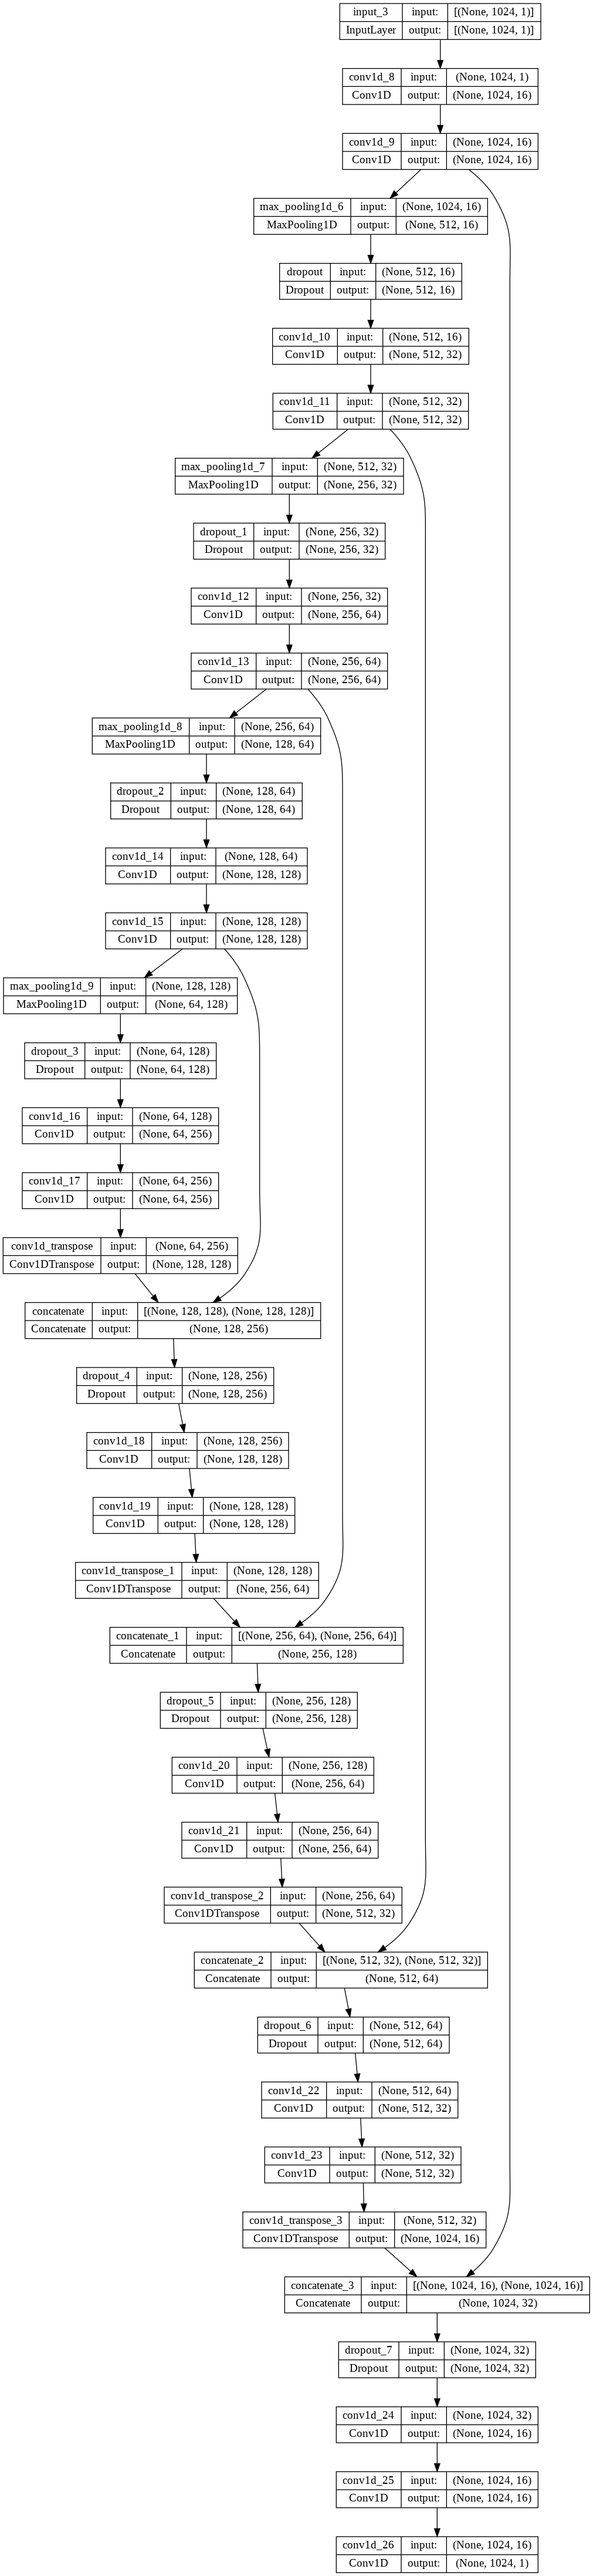

In [42]:
keras.utils.plot_model(Unet1d, to_file = "Unet1d.png", show_shapes=True)

In [43]:
early_stopping = EarlyStopping(monitor='loss', patience=2)

Unet1d.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

historytrain = Unet1d.fit(X_train, y_train, epochs=200, batch_size=32 , validation_split = 0.1, callbacks=[early_stopping])

Epoch 1/200
79/79 [==============================] - 117s 1s/step - loss: 0.9387 - accuracy: 0.9372 - val_loss: 0.9706 - val_accuracy: 0.9371
Epoch 2/200
79/79 [==============================] - 115s 1s/step - loss: 0.9629 - accuracy: 0.9376 - val_loss: 0.9706 - val_accuracy: 0.9371
Epoch 3/200
79/79 [==============================] - 114s 1s/step - loss: 0.9629 - accuracy: 0.9376 - val_loss: 0.9706 - val_accuracy: 0.9371


In [44]:
save_Unet1d =Unet1d.save("my_h5_Unet1d.h5")

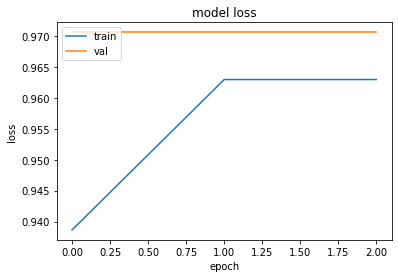

In [45]:
plt.plot(historytrain.history['loss'])
plt.plot(historytrain.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##Bidirectional lstm


In [46]:
from random import random
from numpy import array
from numpy import cumsum
from tensorflow.keras.layers import Dense,Dropout
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM


In [47]:
input_layer = Input(shape=(1024, 1))
lstm1 = Bidirectional(LSTM(32, return_sequences=True))(input_layer)
output_layer =TimeDistributed(Dense(1, activation='sigmoid'))(lstm1)
model_bi = Model(inputs=input_layer, outputs=output_layer)
model_bi.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1024, 1)]         0         
                                                                 
 bidirectional (Bidirectiona  (None, 1024, 64)         8704      
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 1024, 1)          65        
 ibuted)                                                         
                                                                 
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________


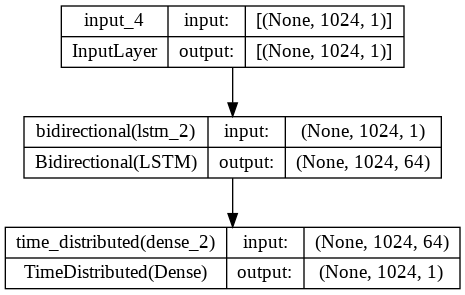

In [48]:
keras.utils.plot_model(model_bi, to_file = "Model_bi.png", show_shapes=True)

In [49]:
early_stopping = EarlyStopping(monitor='loss', patience=2)

model_bi.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_bi = model_bi.fit(X_train, y_train, epochs=200, batch_size=32 , validation_split = 0.1, callbacks=[early_stopping])

Epoch 1/200
79/79 [==============================] - 51s 588ms/step - loss: 0.3338 - accuracy: 0.9375 - val_loss: 0.2372 - val_accuracy: 0.9371
Epoch 2/200
79/79 [==============================] - 44s 558ms/step - loss: 0.2264 - accuracy: 0.9376 - val_loss: 0.2095 - val_accuracy: 0.9371
Epoch 3/200
79/79 [==============================] - 44s 558ms/step - loss: 0.1945 - accuracy: 0.9445 - val_loss: 0.1880 - val_accuracy: 0.9496
Epoch 4/200
79/79 [==============================] - 44s 557ms/step - loss: 0.1811 - accuracy: 0.9509 - val_loss: 0.1939 - val_accuracy: 0.9485
Epoch 5/200
79/79 [==============================] - 45s 573ms/step - loss: 0.1852 - accuracy: 0.9506 - val_loss: 0.1831 - val_accuracy: 0.9513
Epoch 6/200
79/79 [==============================] - 44s 554ms/step - loss: 0.1817 - accuracy: 0.9508 - val_loss: 0.2011 - val_accuracy: 0.9429


In [50]:
save_model_bi =model_bi.save("my_h5_model_bi.h5")

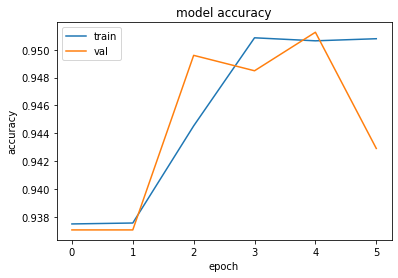

In [51]:
plt.plot(history_bi.history['accuracy'])
plt.plot(history_bi.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

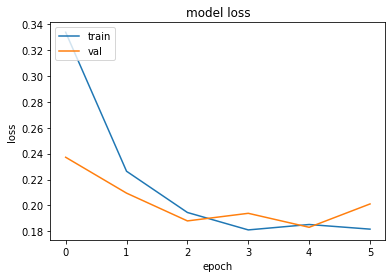

In [52]:
plt.plot(history_bi.history['loss'])
plt.plot(history_bi.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
